# Homework 1 - Problems 4 and 5
## Linear Algebra, Probability and Statistics
## Neha Mahesh

In [52]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
np.set_printoptions(precision=4, suppress=True)

---
# Problem 4: Matrix Transpose and Inverse

## Part 1: Language Matrix

**People and their languages:**
- Anton: French, German
- Geraldine: English, French, Italian
- James: English, Italian, Spanish
- Lauren: All languages except French (German, English, Italian, Spanish)

In [56]:
# Create the matrix A
# Rows: Anton, Geraldine, James, Lauren
# Columns: French, German, English, Italian, Spanish

A = np.array([
    [1, 1, 0, 0, 0],  # Anton: French, German
    [1, 0, 1, 1, 0],  # Geraldine: French, English, Italian
    [0, 0, 1, 1, 1],  # James: English, Italian, Spanish
    [0, 1, 1, 1, 1]   # Lauren: German, English, Italian, Spanish
])

print("Matrix A (People × Languages):")
print("Rows: Anton, Geraldine, James, Lauren")
print("Columns: French, German, English, Italian, Spanish")
print(A)

Matrix A (People × Languages):
Rows: Anton, Geraldine, James, Lauren
Columns: French, German, English, Italian, Spanish
[[1 1 0 0 0]
 [1 0 1 1 0]
 [0 0 1 1 1]
 [0 1 1 1 1]]


In [58]:
# Compute A * A^T
AAT = np.dot(A, A.T)

print("Matrix A*A^T (People × People):")
print(AAT)
print("\nRows/Columns: Anton, Geraldine, James, Lauren")

Matrix A*A^T (People × People):
[[2 1 0 1]
 [1 3 2 2]
 [0 2 3 3]
 [1 2 3 4]]

Rows/Columns: Anton, Geraldine, James, Lauren



The matrix A·A^T is a 4×4 matrix where:
- **Diagonal entries (i,i)**: Represent the total number of languages that person i speaks
- **Off-diagonal entries (i,j)**: Represent the number of common languages between person i and person j

From the matrix above:
- Anton speaks 2 languages
- Geraldine speaks 3 languages
- James speaks 3 languages
- Lauren speaks 4 languages
- Anton and Geraldine share 1 language (French)
- Geraldine and James share 2 languages (English and Italian)
- etc.

In [61]:
# Compute A^T * A
ATA = np.dot(A.T, A)

print("Matrix A^T*A (Languages × Languages):")
print(ATA)
print("\nRows/Columns: French, German, English, Italian, Spanish")

Matrix A^T*A (Languages × Languages):
[[2 1 1 1 0]
 [1 2 1 1 1]
 [1 1 3 3 2]
 [1 1 3 3 2]
 [0 1 2 2 2]]

Rows/Columns: French, German, English, Italian, Spanish


**Interpretation of A^T·A:**

The matrix A^T·A is a 5×5 matrix where:
- Diagonal entries (i,i): Represent the total number of people who speak language i
- *Off-diagonal entries (i,j): Represent the number of people who speak both language i and language j

From the matrix above:
- French is spoken by 2 people
- German is spoken by 2 people
- English is spoken by 3 people
- Italian is spoken by 3 people
- Spanish is spoken by 2 people
- 1 person speaks both French and German (Anton)
- 3 people speak both English and Italian (Geraldine, James, Lauren)
- etc.

## Part 2: Random Matrices and Inverses

Generate 3 random matrices and compute their inverses.

In [65]:
# Set random seed for reproducibility
np.random.seed(42)

matrices = []
inverses = []

for i in range(3):
    print(f"\n{'='*60}")
    print(f"Matrix {i+1}")
    print('='*60)
    
    # Generate random 3x3 matrix with integers from -10 to 10
    M = np.random.randint(-10, 11, size=(3, 3))
    
    # Check if matrix is invertible (determinant != 0)
    det = np.linalg.det(M)
    
    # If not invertible, generate a new one
    attempts = 0
    while abs(det) < 1e-10 and attempts < 100:
        M = np.random.randint(-10, 11, size=(3, 3))
        det = np.linalg.det(M)
        attempts += 1
    
    print(f"\nOriginal Matrix M{i+1}:")
    print(M)
    print(f"\nDeterminant: {det:.6f}")
    
    # Compute inverse
    M_inv = np.linalg.inv(M)
    print(f"\nInverse of M{i+1}:")
    print(M_inv)
    
    # Verify: M * M^(-1) = I
    product = np.dot(M, M_inv)
    print(f"\nM{i+1} × M{i+1}^(-1):")
    print(product)
    
    # Check if close to identity
    identity = np.eye(3)
    is_identity = np.allclose(product, identity)
    print(f"\nVerification: Product is identity matrix? {is_identity}")
    
    matrices.append(M)
    inverses.append(M_inv)


Matrix 1

Original Matrix M1:
[[-4  9  4]
 [ 0 -3 10]
 [-4  8  0]]

Determinant: -88.000000

Inverse of M1:
[[ 0.9091 -0.3636 -1.1591]
 [ 0.4545 -0.1818 -0.4545]
 [ 0.1364  0.0455 -0.1364]]

M1 × M1^(-1):
[[ 1.  0.  0.]
 [ 0.  1. -0.]
 [-0.  0.  1.]]

Verification: Product is identity matrix? True

Matrix 2

Original Matrix M2:
[[ 0 10 -7]
 [-3 -8 10]
 [-9  1 -5]]

Determinant: -525.000000

Inverse of M2:
[[-0.0571 -0.0819 -0.0838]
 [ 0.2     0.12   -0.04  ]
 [ 0.1429  0.1714 -0.0571]]

M2 × M2^(-1):
[[ 1. -0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]

Verification: Product is identity matrix? True

Matrix 3

Original Matrix M3:
[[ -9  10 -10]
 [  1   1   6]
 [ -1   5   4]]

Determinant: 74.000000

Inverse of M3:
[[-0.3514 -1.2162  0.9459]
 [-0.1351 -0.6216  0.5946]
 [ 0.0811  0.473  -0.2568]]

M3 × M3^(-1):
[[ 1. -0.  0.]
 [ 0.  1. -0.]
 [-0. -0.  1.]]

Verification: Product is identity matrix? True


---
# Problem 5: Average, Variance, and Correlation

In [68]:
# Load the dataset
df = pd.read_csv('kc_house_data.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
df.head()

Dataset shape: (21613, 21)

Columns: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

First 5 rows:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [70]:
# Remove id, date, and zipcode columns
columns_to_remove = ['id', 'date', 'zipcode']
df_clean = df.drop(columns=[col for col in columns_to_remove if col in df.columns])

print(f"Shape after removing columns: {df_clean.shape}")
print(f"\nRemaining columns: {df_clean.columns.tolist()}")

Shape after removing columns: (21613, 18)

Remaining columns: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


## Part 1: Average, Min, Max, and Variance

In [73]:
# Get feature columns (all except 'price')
feature_cols = [col for col in df_clean.columns if col != 'price']

# Compute statistics
stats_list = []

for col in feature_cols:
    stats_list.append({
        'Feature': col,
        'Average': df_clean[col].mean(),
        'Min': df_clean[col].min(),
        'Max': df_clean[col].max(),
        'Variance': df_clean[col].var()
    })

stats_df = pd.DataFrame(stats_list)

print("Feature Statistics:")
print("="*80)
stats_df

Feature Statistics:


,Feature,Average,Min,Max,Variance
0,bedrooms,3.370842,0.0000,3.300000e+01,8.650150e-01
1,bathrooms,2.114757,0.0000,8.000000e+00,5.931513e-01
2,sqft_living,2079.899736,290.0000,1.354000e+04,8.435337e+05
3,sqft_lot,15106.967566,520.0000,1.651359e+06,1.715659e+09
4,floors,1.494309,1.0000,3.500000e+00,2.915880e-01
5,waterfront,0.007542,0.0000,1.000000e+00,7.485226e-03
6,view,0.234303,0.0000,4.000000e+00,5.872426e-01
7,condition,3.409430,1.0000,5.000000e+00,4.234665e-01
8,grade,7.656873,1.0000,1.300000e+01,1.381703e+00
9,sqft_above,1788.390691,290.0000,9.410000e+03,6.857347e+05


In [75]:
# Find features with lowest and highest average
lowest_avg_feature = stats_df.loc[stats_df['Average'].idxmin()]
highest_avg_feature = stats_df.loc[stats_df['Average'].idxmax()]

print("LOWEST Average:")
print(f"  Feature: {lowest_avg_feature['Feature']}")
print(f"  Average: {lowest_avg_feature['Average']:.6f}")

print("\nHIGHEST Average:")
print(f"  Feature: {highest_avg_feature['Feature']}")
print(f"  Average: {highest_avg_feature['Average']:.6f}")

LOWEST Average:
  Feature: long
  Average: -122.213896

HIGHEST Average:
  Feature: sqft_lot
  Average: 15106.967566


In [95]:
# Find features with lowest and highest variance
lowest_var_feature = stats_df.loc[stats_df['Variance'].idxmin()]
highest_var_feature = stats_df.loc[stats_df['Variance'].idxmax()]

print("LOWEST Variance:")
print(f"  Feature: {lowest_var_feature['Feature']}")
print(f"  Variance: {lowest_var_feature['Variance']:.6f}")

print("\nHIGHEST Variance:")
print(f"  Feature: {highest_var_feature['Feature']}")
print(f"  Variance: {highest_var_feature['Variance']:.6f}")

LOWEST Variance:
  Feature: waterfront
  Variance: 0.007485

HIGHEST Variance:
  Feature: sqft_lot
  Variance: 1715658774.175454


## Part 2: Correlation with Response 

In [98]:
# Compute correlations
correlations = []

for col in feature_cols:
    corr = df_clean[col].corr(df_clean['price'])
    correlations.append({
        'Feature': col,
        'Correlation': corr
    })

corr_df = pd.DataFrame(correlations)
corr_df = corr_df.sort_values('Correlation', ascending=False)

print("Correlation Coefficients with Price:")
print("="*60)
corr_df

Correlation Coefficients with Price:


,Feature,Correlation
2,sqft_living,0.702035
8,grade,0.667434
9,sqft_above,0.605567
15,sqft_living15,0.585379
1,bathrooms,0.525138
6,view,0.397293
10,sqft_basement,0.323816
0,bedrooms,0.308350
13,lat,0.307003
5,waterfront,0.266369


In [82]:
# Features with positive correlation
positive_corr_features = corr_df[corr_df['Correlation'] > 0]

print("Features with POSITIVE correlation with price:")
print(positive_corr_features['Feature'].tolist())

print(f"\nTotal: {len(positive_corr_features)} features")

Features with POSITIVE correlation with price:
['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built', 'condition', 'long']

Total: 17 features


In [84]:
# Feature with highest positive correlation
highest_corr_feature = corr_df.iloc[0]

print("Feature with HIGHEST positive correlation:")
print(f"  Feature: {highest_corr_feature['Feature']}")
print(f"  Correlation: {highest_corr_feature['Correlation']:.6f}")

Feature with HIGHEST positive correlation:
  Feature: sqft_living
  Correlation: 0.702035


## Part 3: Negative Correlations

Identify features with negative correlation with the response.

In [87]:
# Features with negative correlation
negative_corr_features = corr_df[corr_df['Correlation'] < 0]

if len(negative_corr_features) > 0:
    print("Features with NEGATIVE correlation with price:")
    print(negative_corr_features)
else:
    print("No features found with negative correlation with price.")

No features found with negative correlation with price.


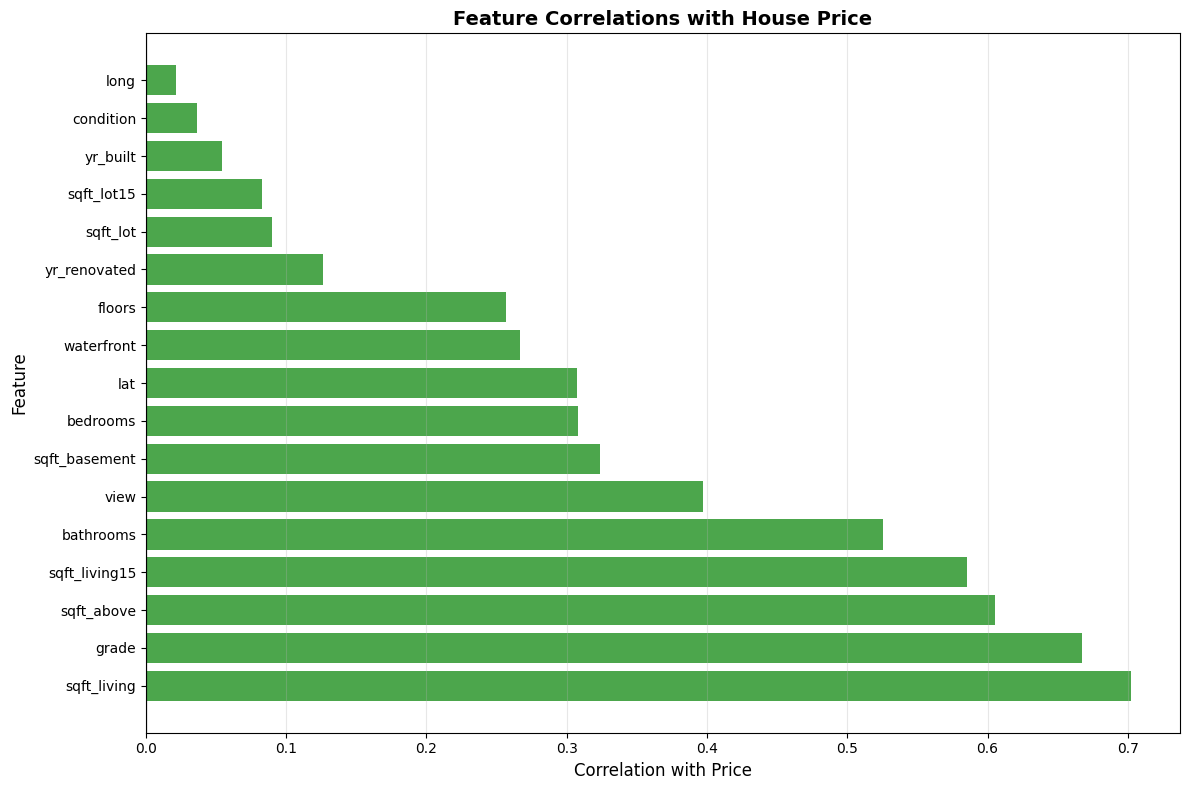

In [89]:
# Plot 1: Correlation bar chart
plt.figure(figsize=(12, 8))
colors = ['green' if x > 0 else 'red' for x in corr_df['Correlation']]
plt.barh(corr_df['Feature'], corr_df['Correlation'], color=colors, alpha=0.7)
plt.xlabel('Correlation with Price', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Correlations with House Price', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

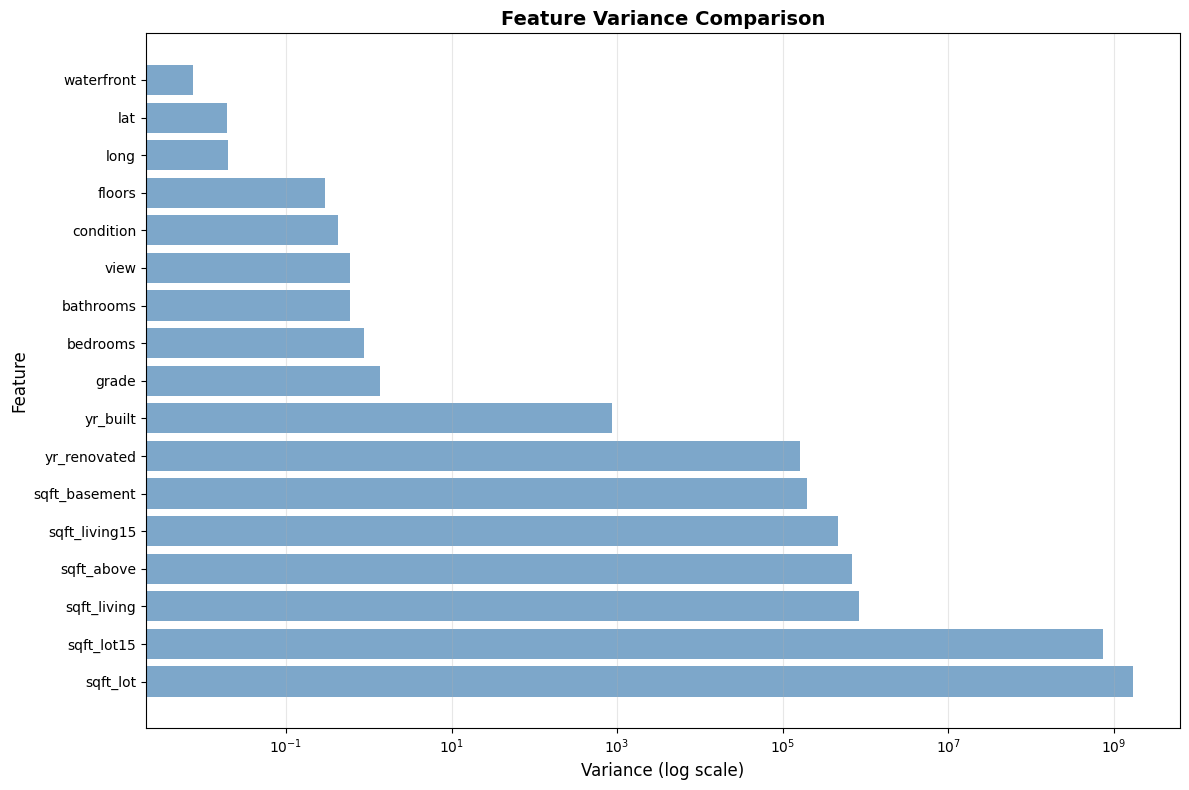

In [91]:
# Plot 2: Variance comparison (log scale)
plt.figure(figsize=(12, 8))
stats_df_sorted = stats_df.sort_values('Variance', ascending=False)
plt.barh(stats_df_sorted['Feature'], stats_df_sorted['Variance'], color='steelblue', alpha=0.7)
plt.xlabel('Variance (log scale)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Variance Comparison', fontsize=14, fontweight='bold')
plt.xscale('log')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

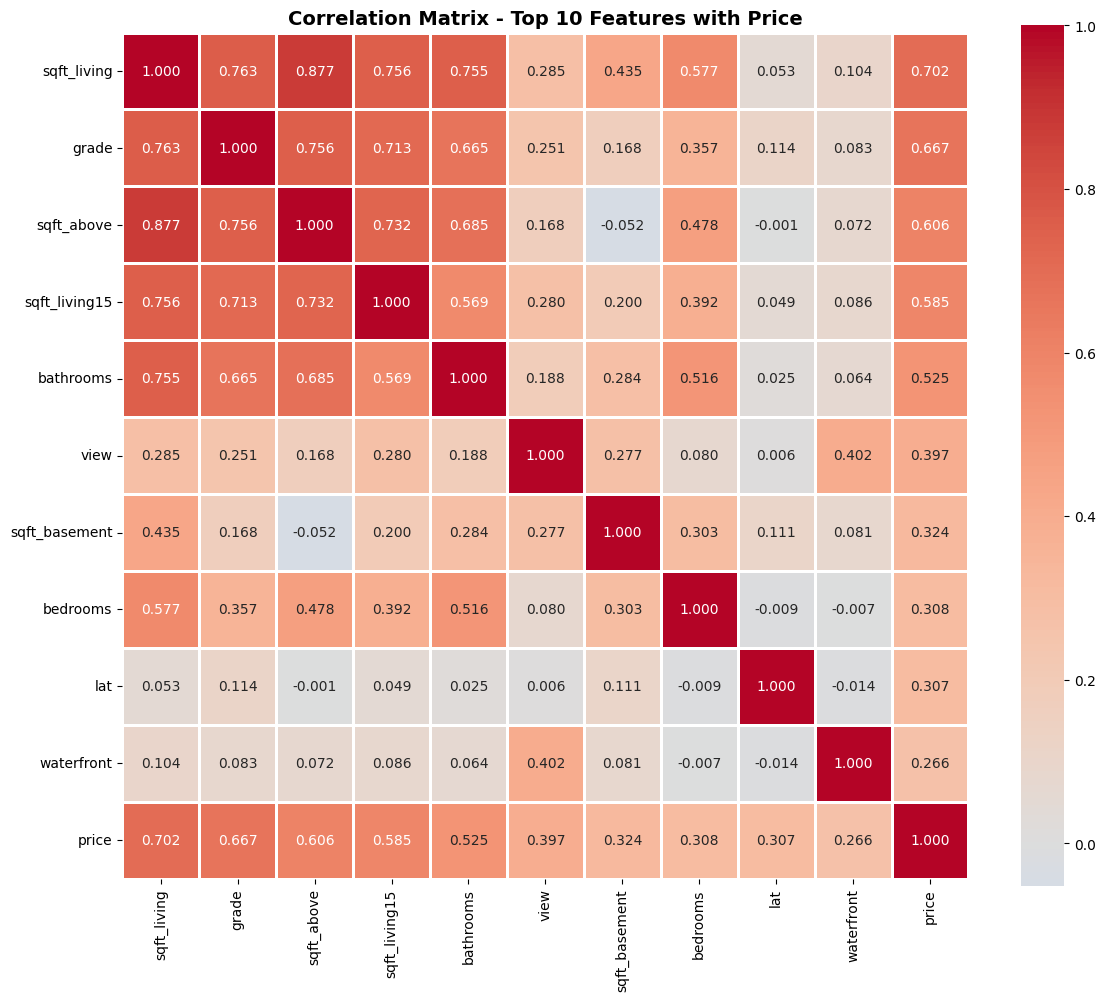

In [35]:
# Plot 3: Correlation heatmap of top features
top_features = corr_df.head(10)['Feature'].tolist() + ['price']
correlation_matrix = df_clean[top_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix - Top 10 Features with Price', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()